In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('video_sale_ranked.csv')
data.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,5,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [16]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [17]:
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10101 entries, 0 to 10100
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          10101 non-null  int64  
 1   Name          10101 non-null  object 
 2   Platform      10101 non-null  object 
 3   Year          10101 non-null  int64  
 4   Genre         10101 non-null  object 
 5   Publisher     10101 non-null  object 
 6   NA_Sales      10101 non-null  float64
 7   EU_Sales      10101 non-null  float64
 8   JP_Sales      10101 non-null  float64
 9   Other_Sales   10101 non-null  float64
 10  Global_Sales  10101 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 868.2+ KB


In [19]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000,10101.000000
mean,5051.000000,2008.251262,0.264604,0.167922,0.043852,0.063408,0.539971
std,2916.051869,4.104432,0.788811,0.554945,0.182005,0.228938,1.555923
min,1.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2526.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,5051.000000,2008.000000,0.080000,0.030000,0.000000,0.010000,0.180000
75%,7576.000000,2011.000000,0.240000,0.140000,0.020000,0.050000,0.500000
max,10101.000000,2017.000000,41.490000,29.020000,4.870000,10.570000,82.740000


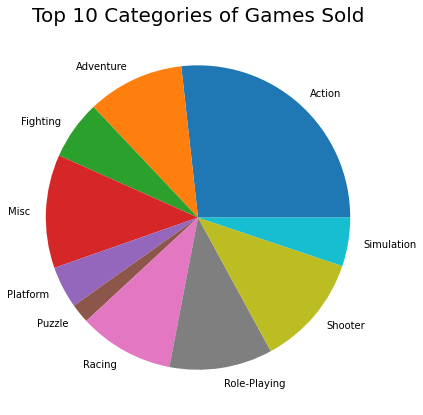

In [20]:
#TOP 10 games of this data
game = data.groupby("Genre")["Global_Sales"].count().head(10)
plt.figure(figsize=(7,7))
plt.pie(game,labels=game.index)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

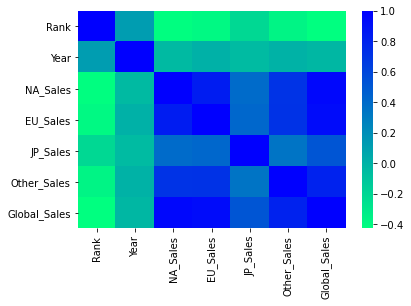

In [21]:
#Corelation between features of data
sns.heatmap(data.corr(), cmap="winter_r")
plt.show()

In [22]:
print(data.corr())

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.123310 -0.415867 -0.390432 -0.203997    -0.360749   
Year          0.123310  1.000000 -0.038395  0.010765 -0.045436     0.003792   
NA_Sales     -0.415867 -0.038395  1.000000  0.839926  0.400679     0.715211   
EU_Sales     -0.390432  0.010765  0.839926  1.000000  0.422013     0.717211   
JP_Sales     -0.203997 -0.045436  0.400679  0.422013  1.000000     0.350506   
Other_Sales  -0.360749  0.003792  0.715211  0.717211  0.350506     1.000000   
Global_Sales -0.426848 -0.020393  0.958607  0.937318  0.522185     0.806476   

              Global_Sales  
Rank             -0.426848  
Year             -0.020393  
NA_Sales          0.958607  
EU_Sales          0.937318  
JP_Sales          0.522185  
Other_Sales       0.806476  
Global_Sales      1.000000  


In [23]:
#Spliting the dataset and training
X = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
Y = data[["Global_Sales"]]

In [24]:
#splitting dataset into training and test set
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [25]:
#Linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [26]:
ypred = regressor.predict(xtest)

In [28]:
ypred

array([[0.39002492],
       [0.33997624],
       [0.62001028],
       ...,
       [0.05041887],
       [0.02053916],
       [0.02055067]])

In [31]:
regressor.score(xtest,ytest)

0.9999949170761311